In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
import scipy.optimize as opt

def radec_to_xyz(ra, dec):
    x = math.cos(np.deg2rad(dec)) * math.cos(np.deg2rad(ra))
    y = math.cos(np.deg2rad(dec)) * math.sin(np.deg2rad(ra))
    z = math.sin(np.deg2rad(dec))

    return np.array([x, y, z], dtype=np.float64)

#functions from sncosmo
def cmb_dz(ra, dec):
    """See http://arxiv.org/pdf/astro-ph/9609034
     CMBcoordsRA = 167.98750000 # J2000 Lineweaver
     CMBcoordsDEC = -7.22000000
    """

    # J2000 coords from NED
    CMB_DZ = 371000. / 299792458.
    CMB_RA = 168.01190437
    CMB_DEC = -6.98296811
    CMB_XYZ = radec_to_xyz(CMB_RA, CMB_DEC)

    coords_xyz = radec_to_xyz(ra, dec)
    
    dz = CMB_DZ * np.dot(CMB_XYZ, coords_xyz)

    return dz

def cmb_to_helio(z, ra, dec):
    """Convert from CMB-frame redshift to heliocentric redshift.
    
    Parameters
    ----------
    z : float
        CMB-frame redshift.
    ra, dec: float
        RA and Declination in degrees (J2000).
    """

    dz = -cmb_dz(ra, dec)
    one_plus_z_pec = math.sqrt((1. + dz) / (1. - dz))
    one_plus_z_helio = (1. + z) * one_plus_z_pec

    return one_plus_z_helio - 1.


In [2]:
def one_lenght_redshift(u):
    
    redshift_value = None
    
    #if there is kind in the list continue
    if "kind" in data[url]["redshift"][0]:

        #if its heliocentric pick then
        if data[url]["redshift"][0]["kind"] == "heliocentric":

            redshift_value = float(data[url]["redshift"][0]["value"])
            print(redshift_value)
            
        #if its cmb pick then    
        elif data[url]["redshift"][0]["kind"] == "cmb":

            #convertion of hours to degrees
            if data[url]["ra"][0]["u_value"] == "hours" and data[url]["dec"][0]["u_value"] == "degrees":

                c = SkyCoord(str(data[url]["ra"][0]["value"]),str(data[url]["dec"][0]["value"]), unit=(units.hourangle, units.deg))

            elif data[url]["ra"][0]["u_value"] == "hours" and data[url]["dec"][0]["u_value"] == "hours":

                c = SkyCoord(str(data[url]["ra"][0]["value"]),str(data[url]["dec"][0]["value"]), unit=(units.hourangle, units.hourangle))

            else:

                print("Erro!")

            redshift_value = float(cmb_to_helio(float(data[url]["redshift"][0]["value"]), c.ra.deg, c.dec.deg))
            print(redshift_value)
    #if there is only 1 and its not specificated
    else:
            
        redshift_value = float(data[url]["redshift"][0]["value"])
        print(redshift_value)
      
    return redshift_value

In [3]:
def redshift_selection(url):
    
    redshift_value = None
    
    for nredshift in range(0,len(data[url]["redshift"])):
            
        #if there is kind in the list continue
        if "kind" in data[url]["redshift"][nredshift]:

            #if its heliocentric pick then
            if data[url]["redshift"][nredshift]["kind"] == "heliocentric":

                redshift_value = float(data[url]["redshift"][nredshift]["value"])
                print(redshift_value)
                break
                
            #if its cmb    
            elif data[url]["redshift"][nredshift]["kind"] == "cmb":

                #convertion of hours to degrees
                if data[url]["ra"][nredshift]["u_value"] == "hours" and data[url]["dec"][nredshift]["u_value"] == "degrees":

                    c = SkyCoord(str(data[url]["ra"][nredshift]["value"]),str(data[url]["dec"][nredshift]["value"]), unit=(units.hourangle, units.deg))

                elif data[url]["ra"][nredshift]["u_value"] == "hours" and data[url]["dec"][nredshift]["u_value"] == "hours":

                    c = SkyCoord(str(data[url]["ra"][nredshift]["value"]),str(data[url]["dec"][nredshift]["value"]), unit=(units.hourangle, units.hourangle))

                else:

                    print("Erro 1!")

                #convertion of cmb to heliocentric
                redshift_value = float(cmb_to_helio(float(data[url]["redshift"][nredshift]["value"]), c.ra.deg, c.dec.deg))
                print(redshift_value)
                break
            
    return redshift_value

In [4]:
def redshift_HB(url):
    redshift_value = None
    '''
    maxredshift = None
    
    sumredshift = 0
    HB_test = 0
    for nredshift in range(0,len(data[url]["redshift"])):
            
        #if not realize a sum to obtain a mean value
        if "kind" not in data[url]["redshift"][nredshift]:
            
            sumredshift = sumredshift + float(data[url]["redshift"][nredshift]["value"])
                
            #if the sn is in the hubnle flow realize a mean value of the redshifts
            if float(data[url]["redshift"][nredshift]["value"]) > 0.15:
                
                HB_test = 1
                
            #if not the first redshift is the max redshift
            if nredshift == 0:
                maxredshift = float(data[url]["redshift"][nredshift]["value"])
                
            else:
                #then analise if the next redshift is grater than max redshift 
                if float(data[url]["redshift"][nredshift]["value"]) > maxredshift:
                        
                    maxredshift = float(data[url]["redshift"][nredshift]["value"])
        
    if HB_test == 1:
            
        #if sne is in the hubble flow realize a mean value
        redshift_value = sumredshift/len(data[url]["redshift"])
        print(redshift_value)  
    elif HB_test == 0:
            
        #if not the maximum redshift is the heliocentric redshift
        redshift_value = maxredshift
        print(redshift_value)
      '''  
    return redshift_value

In [5]:
def redshift_value(url):
    redshift_func = None
    #if there is 1 value use it
    if len(data[url]["redshift"]) == 1:
        
        redshift_func = one_lenght_redshift(url)

    #if not...
    if len(data[url]["redshift"]) == 1 and redshift_func is None:
        
        print("redshift nao encontrado")
        
    if len(data[url]["redshift"]) > 1:
        
        redshift_func = redshift_selection(url)
                
    if len(data[url]["redshift"]) > 1 and redshift_func is None:
        redshift_func = redshift_HB(url)
        
    return redshift_func

In [6]:
file = open("training_names.txt")
lines = file.readlines()
file.close()

sn_names = []

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()
    sn_names.append(co[0])

In [7]:
sn_names=glob.glob("*.json")

In [8]:
len(sn_names)

135

In [14]:
final_gradex = np.linspace(-20, 50, 71)
final_gradey = np.linspace(2000, 9200, 301)
final_flux = [[[] for x in range(0,len(final_gradey))] for y in range(0,len(final_gradex))] 
tolerance_x = 0.2
tolerance_y = 2.0
total_sn = 0
#print(final_gradex)
#print(final_gradey)
#names of .json in the folder
#names=glob.glob("*.json")
#for each sn
for u in range(0,1):
    print(sn_names[u])

    #reading the .json file
    with open("SN2005A.json", "r") as read_file:
        data = json.load(read_file)

    #catching the name of supernova
    url="SN2005A.json"
    if url.endswith('.json'):
        url = url[:-5]
    #print(url)
    #defining the lists
    wavelengthdat=[]
    fluxdat=[]
    timedat=[]

    redshift = redshift_value(url)
        
    #print("valor final")    
    #print(redshift)

    if redshift is not None:
        #print(redshift)
        #time correction to julian date
        t0dat = data[url]["maxdate"][0]["value"]
        t0 = t0dat.split("/")
        t0=str(t0[0])+'-'+str(t0[1])+'-'+str(t0[2])
        t0=Time(t0).mjd

        #spectra data
        i=0
        n=0
        times = []
        max_fluxes = []
        spectra_number = 0
        time_verification = 0
        wavelength_verification = 0
        while i < 10:

            spectratime = float(data[url]["spectra"][i]["time"]) - float(t0)
            #print(spectratime)
            #verifing if its calibrated and if it have a redshift correction 
            alert1 = 0 #for calibration
            alert2 = 0 #for redshift correction

            if data[url]["spectra"][i]["u_fluxes"] == "erg/s/cm^2/Angstrom":          
                alert1 = 1 #first alert

                if "deredshifted" in data[url]["spectra"][i]:
                    alert2 = 1 #second alert

            #if its calibrated and corrected
            if alert1 == 1 and alert2 == 1:
                #print("ok")
                #there are 3 collumns: wavelength flux and flux error
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)            

                    '''        
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''
                    print("ok")
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)

                #there are 2 collumns: wavelength and flux
                if len(data[url]["spectra"][i]["data"][0]) == 20:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)            

                    '''        
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)
                    

            #if its calibrated, redshift not adjusted but with a clear redshift
            if alert1 ==1 and alert2 == 0:   

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)


                    #redshift correction
                    fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                    df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                    spectratime = spectratime/(1+redshift) #for time

                    '''
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))
                    print("ok")
                    #for time
                    timedat.append(spectratime)

                #there are 2 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 20:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                    #sort the data by wavelength
                    df.sort_values(by=['wavelength'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)

                    #redshift correction
                    fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                    df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                    spectratime = spectratime/(1+redshift) #for time

                    '''        
                    max_flux = max(fluxtemp)
                    max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                    if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                        max_wavelength = df['wavelength'][max_flux_pos[0]]
                        if 3800 < max_wavelength < 4200:

                            wavelength_verification = 1
                            max_fluxes.append(max_flux)
                            times.append(spectratime) 


                    if min_value_wavelength < 4000 < max_value_wavelength:
                        f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                        if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                            ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                        if 3800 < ab[0] < 4200: 

                            wavelength_verification = 1
                            max_flux.append(f(ab[0]))
                            times.append(spectratime)
                    '''                
                    spectra_number = spectra_number + 1    
                    #making a list of lists 
                    wavelengthdat.append(np.array(df['wavelength']))
                    fluxdat.append(np.array(fluxtemp))

                    #for time
                    timedat.append(spectratime)

            i = i + 1

        final_wavelengthdat = []
        final_fluxdat = []
        final_timedat = []
        '''
        table = []
        for k in range(0,len(timedat)):
            for l in range(0, len(wavelengthdat)):
                table.append((timedat[k], wavelengthdat[k][l], fluxdat[k][l]))

        f = open(url+".dat", 'w')
        f.write(tabulate(table, tablefmt="plain"))
        f.close()
        '''
        #if wavelength_verification == 1:
        #if min(times) > -10 and max(times) < 10:
        final_wavelengthdat = wavelengthdat
        final_fluxdat = fluxdat
        final_timedat = timedat
        total_sn = total_sn + 1   
            #print(":)")

        #else:
            #print(":(")

        #print(spectra_number)

        for m in range(0,len(final_gradex)):

            for n in range(0,len(final_gradey)):

                for i in range(0,len(final_timedat)):
                    if (final_gradex[m] - tolerance_x) < final_timedat[i] < (final_gradex[m] + tolerance_x):

                        for j in range(0,len(final_wavelengthdat[i])):

                            if (final_gradey[n] - tolerance_y) < final_wavelengthdat[i][j] < (final_gradey[n] + tolerance_y):
                                final_flux[m][n].append(final_fluxdat[i][j])        
                                #print(final_gradex[m], final_gradey[n])
                               


SN2007on.json
0.01914
ok
ok
ok


<IPython.core.display.Javascript object>


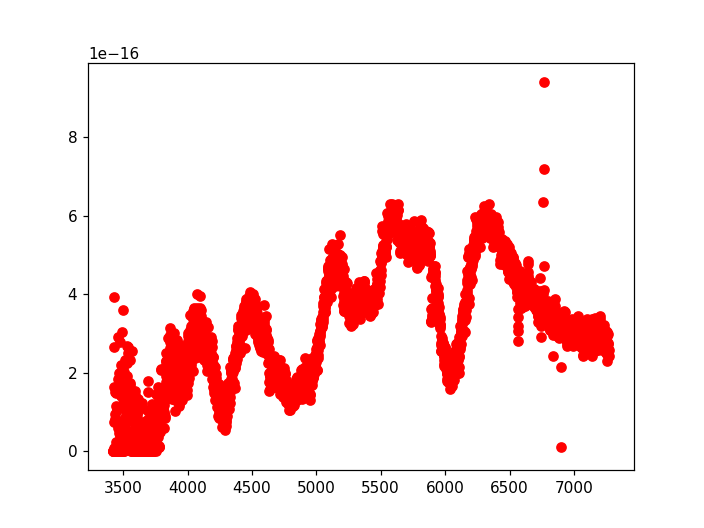

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(wavelengthdat[1], fluxdat[1],'ro')
plt.show()

In [48]:
from scipy.interpolate import interp1d
f = interp1d(wavelengthdat[1], fluxdat[1])

In [49]:
len(fluxdat)

3

In [52]:
t1 = np.linspace(min(wavelengthdat[1])-100, max(wavelengthdat[1])+100, num=2000, endpoint=True)

In [53]:
%matplotlib notebook
plt.plot(t1, f(t1), 'bo')

ValueError: A value in x_new is below the interpolation range.

In [24]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
fluxdat[4]

array([1.98997797e-15, 1.81673755e-15, 1.75737065e-15, 1.88002346e-15,
       1.86415320e-15, 1.68056818e-15, 1.81482414e-15, 2.03358727e-15,
       2.03346448e-15, 2.01672490e-15, 1.79221110e-15, 1.87232868e-15,
       2.21498291e-15, 1.87019037e-15, 2.04172192e-15, 1.97323819e-15,
       2.04768736e-15, 2.02981181e-15, 1.96777432e-15, 2.17220211e-15,
       1.92894324e-15, 2.19703583e-15, 1.96847001e-15, 1.91088350e-15,
       1.96292429e-15, 2.19983913e-15, 1.99153326e-15, 2.23809732e-15,
       1.81659430e-15, 2.00349453e-15, 2.07096529e-15, 2.11983400e-15,
       2.14289746e-15, 1.90522502e-15, 2.02922847e-15, 2.08826784e-15,
       2.03527567e-15, 2.06031383e-15, 2.13210255e-15, 1.96251500e-15,
       1.89057270e-15, 1.72568160e-15, 1.72120003e-15, 1.85065721e-15,
       1.86085865e-15, 2.11360263e-15, 2.23818941e-15, 1.87852946e-15,
       1.75496610e-15, 1.83058174e-15, 1.90185875e-15, 1.71958335e-15,
       1.69624393e-15, 1.81756646e-15, 1.63876988e-15, 1.68281915e-15,
      

In [16]:
wavelengthdat[4]

array([3634.62271248, 3636.08828616, 3637.55385983, 3639.01943351,
       3640.48500718, 3641.95058086, 3643.41615453, 3644.8817282 ,
       3646.34730188, 3647.81287555, 3649.27844923, 3650.7440229 ,
       3652.20959658, 3653.67517025, 3655.14074393, 3656.6063176 ,
       3658.07189127, 3659.53746495, 3661.00303862, 3662.4686123 ,
       3663.93418597, 3665.39975965, 3666.86533332, 3668.33090699,
       3669.79648067, 3671.26205434, 3672.72762802, 3674.19320169,
       3675.65877537, 3677.12434904, 3678.58992272, 3680.05549639,
       3681.52107006, 3682.98664374, 3684.45221741, 3685.91779109,
       3687.38336476, 3688.84893844, 3690.31451211, 3691.78008578,
       3693.24565946, 3694.71123313, 3696.17680681, 3697.64238048,
       3699.10795416, 3700.57352783, 3702.03910151, 3703.50467518,
       3704.97024885, 3706.43582253, 3707.9013962 , 3709.36696988,
       3710.83254355, 3712.29811723, 3713.7636909 , 3715.22926458,
       3716.69483825, 3718.16041192, 3719.6259856 , 3721.09155